In [22]:
# python imports
%matplotlib inline
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

from sklearn import neighbors, datasets, feature_selection
from sklearn.cross_validation import train_test_split, cross_val_score

import collections
import operator
import math

In [3]:
# Load in the data
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

iris_df['Target'] = iris.target

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
X_train  [[ 5.4  3.7  1.5  0.2]
 [ 5.1  3.8  1.6  0.2]
 [ 5.5  3.5  1.3  0.2]
 [ 6.7  3.3  5.7  2.1]
 [ 5.   3.4  1.5  0.2]
 [ 6.4  2.8  5.6  2.2]
 [ 6.   3.4  4.5  1.6]
 [ 6.9  3.1  4.9  1.5]
 [ 6.1  2.9  4.7  1.4]
 [ 5.3  3.7  1.5  0.2]
 [ 6.4  2.7  5.3  1.9]
 [ 5.8  2.6  4.   1.2]
 [ 6.1  3.   4.6  1.4]
 [ 6.9  3.2  5.7  2.3]
 [ 4.9  3.1  1.5  0.1]
 [ 5.7  2.5  5.   2. ]
 [ 5.4  3.9  1.7  0.4]
 [ 6.7  3.3  5.7  2.5]
 [ 4.9  2.5  4.5  1.7]
 [ 5.8  2.8  5.1  2.4]
 [ 6.   3.   4.8  1.8]
 [ 6.7  3.1  4.7  1.5]
 [ 4.9  2.4  3.3  1. ]
 [ 5.   2.3  3.3  1. ]
 [ 6.   2.7  5.1  1.6]
 [ 7.6  3.   6.6  2.1]
 [ 5.1  3.5  1.4  0.2]
 [ 6.7  3.1  5.6  2.4]
 [ 7.9  3.8  6.4  2. ]
 [ 4.9  3.1  1.5  0.1]
 [ 5.6  2.7  4.2  1.3]
 [ 5.7  3.8  1.7  0.3]
 [ 6.4  3.2  5.3  2.3]
 [ 7.7  2.8  6.7  2. ]
 [ 5.   3.5  1.6  0.6]
 [ 6.4  3.2  4.5  1.5]
 [ 5.6  2.5  3.9  1.1]
 [ 4.7  3.2  1.6  0.2]
 [ 5.4  3.4  1.7  0.2]
 [

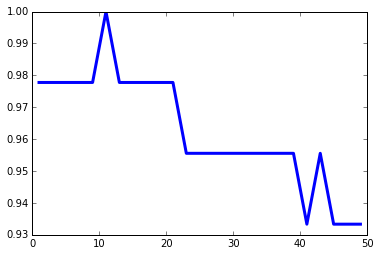

In [4]:
# splitting data and target classifications into train and test sets and run KNN classification
def knn(data, target, n_neighbors):

    # split the data into train and test datasets
    x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=12)

    print type(x_train)
    print type(x_test)
    print type(y_train)
    print type(y_test)
    
    print "X_train ", x_train
    print "X_test ", x_test
    print "y_train ", y_train
    print "y_test ", y_test
    
    # Loop through each neighbors value and append the scores
    scores = []
    for n in n_neighbors:
        clf = neighbors.KNeighborsClassifier(n)
        clf.fit(x_train, y_train)
        scores.append(clf.score(x_test, y_test))
        
    return scores

# use function on iris data
n_neighbors = n_neighbors = range(1, 51, 2)
scores = knn(iris.data, iris.target, n_neighbors)

# plot result
plt.plot(n_neighbors, scores, linewidth=3.0)

In [5]:
def xvalidate(data, target, n_neighbor):
    clf = neighbors.KNeighborsClassifier(n_neighbor, weights='uniform')
    clf.fit(data, target)
    scores = cross_val_score(clf, data, target, cv=5)
    return scores

def mean(values):
    tot = 0
    for v in values:
        tot += v
    return tot / len(values)

for x in range(1, 51, 2):
    xvalidate_scores = xvalidate(iris.data, iris.target, x)
    print xvalidate_scores
    print mean(xvalidate_scores)

[ 0.96666667  0.96666667  0.93333333  0.93333333  1.        ]
0.96
[ 0.96666667  0.96666667  0.93333333  0.96666667  1.        ]
0.966666666667
[ 0.96666667  1.          0.93333333  0.96666667  1.        ]
0.973333333333
[ 0.96666667  1.          0.96666667  0.96666667  1.        ]
0.98
[ 0.96666667  1.          0.96666667  0.93333333  1.        ]
0.973333333333
[ 0.93333333  1.          1.          0.96666667  1.        ]
0.98
[ 0.93333333  1.          0.96666667  0.96666667  1.        ]
0.973333333333
[ 0.93333333  1.          0.93333333  0.96666667  1.        ]
0.966666666667
[ 0.93333333  1.          0.93333333  0.96666667  1.        ]
0.966666666667
[ 0.93333333  1.          0.93333333  0.96666667  1.        ]
0.966666666667
[ 0.93333333  1.          0.93333333  0.96666667  1.        ]
0.966666666667
[ 0.93333333  1.          0.93333333  0.93333333  1.        ]
0.96
[ 0.93333333  0.96666667  0.93333333  0.96666667  1.        ]
0.96
[ 0.9         0.96666667  0.93333333  0.93333333 

In [6]:
print len(iris.data)

def find_optimal_k(data):
    max_neighbors = int(len(data) / 2)
    neighbor_scores = {}
    for x in range(1, max_neighbors, 1):
        xvalidate_scores = xvalidate(iris.data, iris.target, x)        
        avg = mean(xvalidate_scores)
        neighbor_scores[x] = avg
    max_value = max(neighbor_scores.values())
    max_index = neighbor_scores.values().index(max_value)
    return max_index

k = find_optimal_k(iris.data)
print k
#print max_index, max_value

150
5


In [7]:
plt.plot(neighbor_scores.keys(), neighbor_scores.values())

NameError: name 'neighbor_scores' is not defined

In [ ]:
import random
def my_xvalidate(data, target, folds):
    data_indices = range(0, len(data), 1)
    random.shuffle(data_indices)    
    n_items = int((len(data) / folds))
    begin_index = 0
    end_index = n_items - 1
    n_neighbors = [11]
    scores = []
    for n_fold in range(folds):
        fold_data = data[begin_index:end_index, :]
        fold_labels = target[begin_index:end_index]
        fold_score = knn(fold_data, fold_labels, n_neighbors)
        scores.append(fold_score[0])
        begin_index += n_items
        end_index += n_items    
    return scores
    
scores = my_xvalidate(iris.data, iris.target, 5)
print scores
print mean(scores)

In [ ]:
n_neighbors = [2, 3, 5, 6, 10, 15]
xvalidate_scores = []
for n_neighbor in n_neighbors:
    scores = xvalidate(iris.data, iris.target, n_neighbor)
    #print scores
    #print mean(scores)
    xvalidate_scores.append(mean(scores))
    
plt.plot(n_neighbors, xvalidate_scores)

In [66]:
# TODO TODO TODO

import math

# compute distance between two N-dimensional points
def dist(data1, data2):
    tot = 0
    for i in range(len(data1)):
        d = data1[i] - data2[i]
        tot += math.pow(d, 2)
    return math.sqrt(tot)

# get the label of a point by looking at the classification of its K closest neighbors
def get_label(data, labels, point, k):
        
    # get the distances between this point and every other
    distances = {}
    for i in range(len(data)):        
        # FIXME: probably want to ignore this point here to avoid hacks later
        distances[i] = dist(data[i], point)
        
    # sort the distances
    sorted_distances = sorted(distances.items(), key=operator.itemgetter(1))
         
    # get the data indices of the closest K points, ignoring distance 0 which is this point! 
    indices = []
    for j in range(k+1):
        if (sorted_distances[j][1] != 0.):
            indices.append(sorted_distances[j][0])
            
    # get the labels of these points
    neighbor_labels = []
    for i in indices:
        neighbor_labels.append(labels[i])
                
    # count the label values
    label_counts = collections.Counter(neighbor_labels)
    sorted_counts = sorted(label_counts.items(), key=operator.itemgetter(1))
        
    # return the label with the most counts
    return sorted_counts[0][0]
        
def my_knn(values, target, k):
    labels = []
    for i in range(len(values)):
        value = values[i]
        label = get_label(values, target, value, k)
        labels.append(label)
    return labels

def compute_score(test, train):
    nright = 0
    for i in range(len(test)):
        if (test[i] == train[i]):
            nright += 1
    return nright / len(test)

# get the labels from running my KNN method (example of just running on all data and labels)
labels = my_knn(iris.data, iris.target, 5)

#print "labels", labels

score = compute_score(labels, iris.target)
print "score", score

score 0.88
